## Setup

Classify

See a picture and code it

Auto Encoder

Make smaller

Generator

### Imports

In [40]:
import numpy as np

# numpy is a fundamental package for numerical computation in Python.
# It provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

import matplotlib.pyplot as plt

# matplotlib.pyplot is a plotting library used for creating static, interactive, and animated visualizations in Python. It's very useful for graphing data.

import urllib.request

# This module is used to open URLs, primarily HTTP, which can be used to fetch data over the Internet.

from PIL import Image

# Part of the Python Imaging Library (now known as Pillow), this module provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.

from imageio import *

# imageio is a library that provides an easy interface to read and write a wide range of image data, including animated images, video, and volumetric data.

import torch

# torch is a popular open-source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab.

from skimage.transform import resize

# Part of the scikit-image library, this function is used for resizing images. It's a handy utility for image processing tasks.

from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes

# These tools from matplotlib help in creating RGB composite images, useful for more complex visualizations involving color images.

from torchvision.models import *

# This submodule of torchvision provides pre-trained models for popular deep learning architectures like ResNets, VGG, etc., which can be used directly for classification, or modified for other similar tasks.

from torchvision.datasets import MNIST,KMNIST,FashionMNIST

# These are datasets provided by torchvision for use in machine learning models.
# MNIST is a dataset of handwritten digits, KMNIST is a dataset of handwritten Japanese characters, and FashionMNIST is a dataset of fashion articles, each used for training models in computer vision tasks.

from skimage.util import montage

# This function creates a montage (composite image) from a given set of images, which is useful for displaying multiple images in a single figure.


In [41]:
!pip install wandb

# This line is a command often used in Jupyter notebooks and similar environments to install Python packages.
# pip is the Python package installer, and this command installs the wandb library, which stands for "Weights & Biases".

import wandb as wb

# This line imports the wandb library into the Python script, and it is aliased as wb to make it easier to refer to in the code.

Weights & Biases (wandb) is a tool designed for tracking experiments, visualizing data, and organizing ML projects. It provides a suite of machine learning tools to improve the performance of models by enabling developers to track and visualize their experiments, compare between them, and easily share findings with colleagues. Using wandb, developers can log model training metrics, system metrics, and even output media like plots or model predictions, all in a centralized and collaborative dashboard.

This tool is particularly useful in machine learning projects for:

Experiment tracking: Log experiments and automatically capture inputs, hyperparameters, outputs, and logs.

Model optimization: Visualize and compare model performance to efficiently fine-tune parameters.

Collaboration: Share results with your team and reproduce experiments from logged data.

By incorporating wandb in a script, you can enhance the manageability and reproducibility of machine learning experiments, making it easier to optimize and scale ML models effectively.

## Plot

This function is designed to visualize data, particularly for arrays or tensors:

Input Check (if type(x) == torch.Tensor): It checks if the input x is a PyTorch tensor. If true, it converts the tensor to a NumPy array. This conversion ensures compatibility with matplotlib, as it plots arrays. The tensor is moved to CPU memory if it's not already (useful when working with CUDA tensors), and detach() is called to remove it from the computation graph, ensuring no gradients are computed for this operation.

Plotting: The function creates a figure and an axes object using plt.subplots(). It then displays the image on these axes with the imshow() function, using a grayscale color map. The axes are turned off with ax.axis('off') to ensure no axis ticks or labels are shown. The size of the figure is set to 5x5 inches, and plt.show() is called to display the plot.

In [42]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

## Montage Plot

This function creates a montage (a composite image) of the input images:

Padding: It pads the input array x with zeros on all sides of each image in the array. This is often done to separate the images visually in the montage.
Montage Creation: The montage() function from skimage.util is used to create a single image array from the padded images. The result is then passed to the plot() function to visualize the montage.


In [43]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

This function retrieves a batch of data for training or testing:

Input: It accepts a mode ('train' or 'test') to decide from which dataset to fetch the data.

Data Fetching:

  

  

*   Train Mode: If mode is "train", it randomly selects a start index r for the batch from the training dataset X and corresponding labels Y, using the global batch size b. It then slices X and Y to get a batch of inputs and labels.
*   Test Mode: Similarly, if mode is "test", it does the same operation but using the test datasets X_test and Y_test.



Return: The function returns the batch of input data x and labels y.

In [44]:
b = 1000

# This sets a global variable b with the value 1000, which is used as the batch size in the next function.

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

## MNIST

The script supports loading three different datasets: MNIST, KMNIST, and FashionMNIST. Each dataset can be toggled by commenting or uncommenting the respective lines. These datasets are popular for training image classification models:

MNIST: Handwritten digits.

KMNIST: Handwritten Japanese characters.

Fashion MNIST: Zalando's article images representing fashion items.

These datasets are loaded from the torchvision library, which conveniently provides functionality to download and cache the datasets. The train parameter determines whether the training set (True) or test set (False) is loaded. All images and labels are then converted to NumPy arrays.

### Load Data

In [45]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

# train_set and test_set: These variables are assigned datasets from the MNIST database. The MNIST function is called with several parameters:
# './data': The directory where the dataset will be stored or retrieved from if already downloaded.
# train=True or train=False: Specifies whether to load the training dataset or the test dataset, respectively.
# download=True: Instructs the function to download the dataset if it is not already present in the specified directory.

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

In [46]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

# Converts the dataset tensors (data for images and targets for labels) into NumPy arrays for further processing or analysis.
# This is typical when performing operations that are more conveniently done in NumPy, or preparing the data for input to certain machine learning frameworks that expect NumPy arrays.

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

# Reshaping and Normalizing:
# [:,None,:,:]: Adds an extra dimension, making the shape from (N, 28, 28) to (N, 1, 28, 28). This is necessary for PyTorch, which expects batch data to have a channel dimension.
# /255: Normalizes the pixel values to be between 0 and 1, improving model convergence during training.

In [47]:
X.shape

# Displays the shape of X.

(60000, 1, 28, 28)

In [48]:
Y[50000]

# Retrieves and prints the label for the 50,000th image in the dataset, useful for verifying data correctness.

3

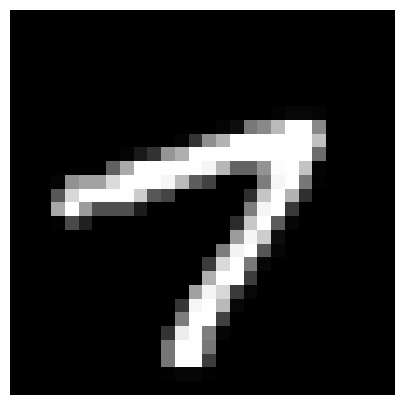

In [49]:
plot(X[101,0,:,:])

# Calls the plot function defined earlier to visualize the 102nd image in the dataset (index 101). The slice [0,:,:] adjusts the tensor to fit the expected input shape for plot.

In [50]:
Y[100]

# Label Display: Similar to Y[50000], this fetches and displays the label of the 101st image.

5

In [51]:
X[0:25,0,:,:].shape

# Batch Shape Inspection: Checks the shape of a slice of the dataset consisting of the first 25 images, confirming dimensions after the channel has been isolated.

(25, 28, 28)

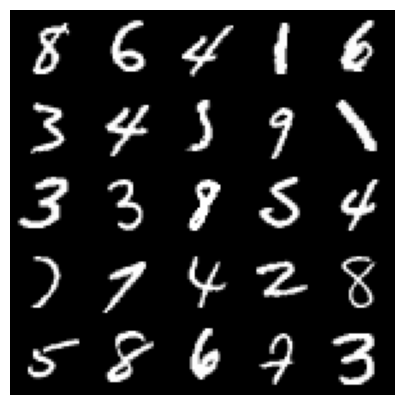

In [52]:
montage_plot(X[125:150,0,:,:])

# 0 2nd input because only one color channel

# Montage Plotting: Visualizes a composite image of 25 images (from index 125 to 149). Useful for examining a series of images together to verify data integrity or for presentation purposes.


```
X.shape[0]
X_test.shape
X.shape[0]
X_test.shape[0]
```

Data Size Queries:

 These lines (likely in an interactive setup) are used to check the total number of examples in the training and test datasets. X.shape[0] and X_test.shape[0] return the number of samples in each respective dataset.

In [53]:
X.shape[0]

60000

In [54]:
X_test.shape

(10000, 1, 28, 28)

In [55]:
X.shape[0]

60000

In [56]:
X_test.shape[0]

10000

In [57]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

# Converts NumPy data to a PyTorch tensor suitable for gradient computations (useful during training), setting the tensor to use a GPU.

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

# Similar to GPU, but creates tensors without gradient computation requirements, suitable for data that doesn't require gradients like inputs or labels during inference.

In [58]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

# Applies the GPU_data function to all data sets, transferring them to GPU and converting them into tensors.

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

# Reshapes the image tensors from (N, 1, 28, 28) to (N, 784), flattening the 28x28 images into single-dimensional vectors necessary for input into certain types of neural networks.

In [ ]:
X.shape

# Confirms the final shape of X after reshaping, ensuring it's ready for model training or inference.


### Classifier


In [59]:
x,y = get_batch('train')

# Function Call: This line calls the get_batch function with the argument 'train' to fetch a batch of training data.
# Variables x and y: These are the returned values where x holds the input images, and y holds the corresponding labels.
# The batch size b was previously set globally to 1000, so x and y should both contain 1000 elements.

In [60]:
x.shape

(1000, 1, 28, 28)



```
plot(x[0].reshape(28,28))
plot(x[1].reshape(28,28))
plot(x[2].reshape(28,28))

```

Visualization: These three lines plot the first three images of the batch. The reshape(28, 28) function call transforms each selected sample from a flattened or differently shaped form into a 28x28 image suitable for plotting. This reshaping is necessary because the plot function is designed to handle 2D images.

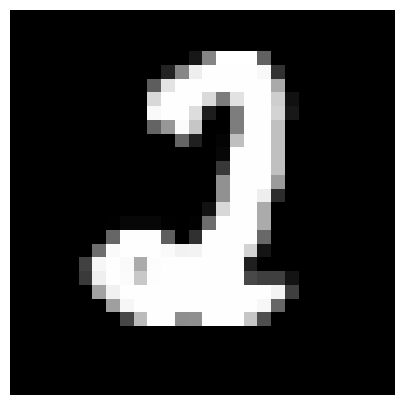

In [61]:
plot(x[0].reshape(28,28))

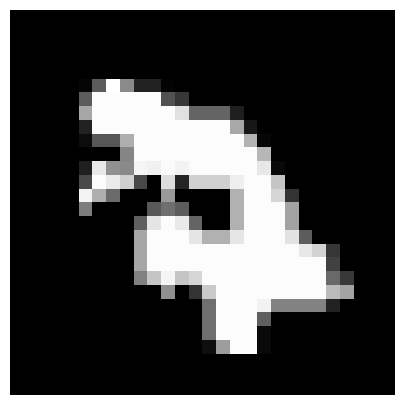

In [62]:
plot(x[1].reshape(28,28))

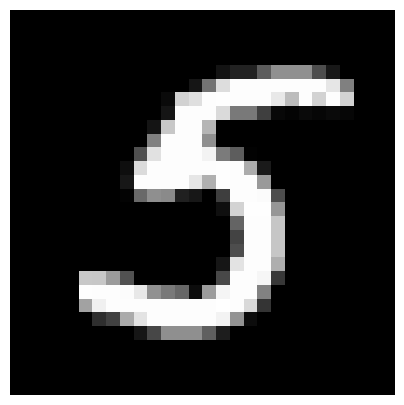

In [63]:
plot(x[2].reshape(28,28))

In [64]:
y[:10]

# Label Inspection: This would generally be used to display the first 10 labels of the batch, which helps
# verify that the data fetching function is working correctly and allows you to understand the kinds
# of labels that are being processed (e.g., in the context of MNIST, these would be digits from 0 to 9).

array([2, 7, 5, 5, 1, 9, 7, 1, 1, 8])

Weight Initialization:

np.random.randn(784,10): This generates a 784x10 matrix of weights with random values drawn from a standard normal distribution. The dimensions suggest that this matrix is intended for a model where the input has 784 features (e.g., flattened MNIST images) and 10 output nodes (e.g., one for each digit class in MNIST).

GPU(...): This function call moves the initialized weight matrix to the GPU and sets it up for gradient computation, preparing it for use in training a neural network. The use of GPU (not GPU_data) suggests that gradients are expected to be computed with respect to these weights, typically during the optimization process.

In [65]:
W = GPU(np.random.randn(784,10))

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [66]:
x.shape, W.shape

# Displays shapes of x and W

NameError: name 'W' is not defined



```
torch.matmul(x, W).shape

```
torch.matmul(x, W): This function multiplies the matrix x by the matrix W. The operation is a dot product between each row of x and each column of W.
.shape: After the multiplication, this part of the code retrieves the shape of the resulting tensor.

Contextual Understanding:
Given the shapes of x and W from previous explanations:
*   x typically would be a batch of input data. From your earlier setup, if x was reshaped right after being fetched and processed (flattened from images of 28x28 to vectors of length 784), and based on the typical batch size (b = 1000), its shape should be (1000, 784).
*   W was initialized to have the shape (784, 10), where 784 corresponds to the number of input features (each pixel in a flattened MNIST image) and 10 corresponds to the output features (likely representing class scores for each digit 0-9 in MNIST).

Resulting Shape:

When you perform torch.matmul(x, W), you're essentially computing the following:


*   For each of the 1000 examples in the batch (x), the 784 features are multiplied with the 784x10 weight matrix (W), resulting in 1000 vectors of size 10.
*   Therefore, the resulting tensor will have the shape (1000, 10). This represents the scores for each of the 10 classes for each example in the batch.

Practical Use:

This operation is typically part of a forward pass in a neural network where x is the input to a fully connected layer and W is the weights of that layer. The result can then be passed to a softmax function or other activation function to convert these scores into probabilities, which are used for classification or further processing in the network.

This way of matrix multiplication is fundamental in neural network operations, especially in layers like fully connected layers where the inputs and weights are combined linearly before applying non-linear transformations.


In [ ]:
torch.matmul(x,W).shape

# One way of doing matrix multiplication



```
(x@W).shape

```



x@W: This line uses the @ operator, which is syntactic sugar for matrix multiplication in Python, introduced in Python 3.5 via PEP 465. It serves the same function as torch.matmul(x, W) but in a more concise form.

.shape: As before, this would print the shape of the resulting tensor, which should be (1000, 10), given x is (1000, 784) and W is (784, 10).

In [ ]:
(x@W).shape

# Another way of doing matrix multiplication

%%timeit: This is a magic command provided by IPython (and by extension, Jupyter and Colab notebooks) to measure the execution time of the subsequent statement. It runs the line multiple times to compute an average time, giving a good idea of how long the matrix multiplication takes. This is useful for performance analysis, especially when optimizing machine learning code.

In [ ]:
%%timeit
x@W

In [ ]:
x@W

In [ ]:
y2 = x@W

# W same as m in y=mx (weights)

In [ ]:
plot(y2[:50])

# This line calls the plot function to visualize the first 50 results in y2.
# Given that y2 is a tensor with shape (1000, 10), attempting to visualize it directly as an image won't be meaningful without additional context or transformation since it's not in an image format.
# If plot is designed to handle such data types effectively, this would typically mean visualizing some aspect of the matrix (perhaps as a heatmap).

In [ ]:
y

# Displays y

In [ ]:
y.shape

# Displays y shape

## One Hot

Function Definition:This one_hot function converts a batch of label indices (e.g., for digit classes 0-9 in MNIST) into a one-hot encoded format.

Tensor Initialization: torch.zeros((y.shape[0], 10)) creates a zero matrix on the GPU where each row represents a label in one-hot format.

Filling the Matrix: The loop iterates through each label, setting the appropriate column to 1 based on the label index.

Return: Outputs the one-hot encoded labels suitable for classification tasks in neural networks.

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

# Calls the one_hot function with the label tensor y to transform it into a one-hot encoded format.

In [ ]:
torch.argmax(y2,1)

# Finding Predictions: torch.argmax(y2, 1) finds the indices of the maximum values along dimension 1, effectively predicting the class based on the highest score in y2.

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

# Accuracy Calculation: Compares these predictions with the true labels y, calculates the proportion of correct predictions over the batch size b.



```
X.shape
X@W
torch.argmax(X@W, 1)
torch.sum(torch.argmax(X@W, 1) == Y) / 60000

```


Forward Pass: Computes the logits X@W (class scores before activation).
Predictions: Uses torch.argmax to get the predicted class labels from the logits.
Accuracy Check: Compares predictions against true labels Y, calculates overall accuracy (assumes the total number of samples is 60,000 for MNIST).

In [ ]:
X.shape

In [ ]:
X@W

In [ ]:
torch.argmax(X@W,1)

In [ ]:
Y

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

In [ ]:
X@W



```
W.shape
W[:,0].shape
plot(W[:,0].reshape(28,28))
plot(W[:,2].reshape(28,28))

```
Inspecting Weights: Checks the shape of the weights matrix W, and specific columns (representing weights for specific classes).

Weight Visualization: Reshapes and plots the weights corresponding to two classes (digit '0' and digit '2') as 28x28 images, visualizing the features that activate for each class.


In [ ]:
W.shape

In [ ]:
W[:,0].shape

In [ ]:
plot(W[:,0].reshape(28,28))

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape



```
(W.T).shape
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

```
Transpose: Transposes the weight matrix W to align dimensions for reshaping.

Montage Visualization: Reshapes the transposed weights to visualize all digit class weights as images in a montage format. This is a powerful way to see what features each part of the model is focusing on across different classes.


In [ ]:
(W.T).shape

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

## Soft Max

Purpose: Computes the softmax activation function for a batch of input tensors.

torch.exp(x - torch.max(x,1)[0][:,None]): This operation stabilizes the softmax computation by subtracting the maximum value in each batch row from every element in the row (to prevent overflow from large exponentials).

Normalization: Divides the exponentiated values by their row sums (making each row of s sum to 1), ensuring the output is a valid probability distribution.

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

## Cross Entropy

Purpose: Calculates the cross-entropy loss between the predicted outputs and the ground-truth labels.

softmax(outputs).log(): First, softmax is applied to the outputs to get probabilities, which are then logged; this is standard for computing logarithmic loss.

[range(outputs.size()[0]), labels.long()]: This indexing selects the logged probabilities corresponding to the actual class labels.

Normalization and Negation: The sum of these logged probabilities is divided by the number of outputs to normalize the loss and negated to make it a minimization problem.

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

## Accuracy

Purpose: Calculates the accuracy of predictions.

torch.max(out, 1)[1]: Finds the predicted class labels (by selecting the index of the maximum output probability).

Accuracy Calculation: Compares the predicted labels to the true labels y, counts the number of correct predictions, and divides by the total number of labels.

In [ ]:
def acc(out,y):       # Count how many answered correctly
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

## Get Batch

Batch Size: Uses b = c.b, which seems to imply that b is a property of some object or configuration c, reflecting flexibility or configuration-driven batch sizing.

Random Sampling: Depending on the mode, it randomly selects a start index r and slices the appropriate dataset (X for training or X_test for testing) and labels (Y or Y_test), ensuring different subsets of data are used in each call.

Return: The selected subsets x and y are returned.

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):     # Takes in something, spits out something

    return x@w[0]

## Gradient Step

Purpose: Updates the model weights based on their gradients to minimize the loss function.

Weight Update: w[0].data - c.L * w[0].grad.data performs the update step. Here, c.L presumably stands for a learning rate, and w[0].grad.data contains the gradient of the loss with respect to the weights. The learning rate scales the gradient to ensure the steps towards the minimum are not too large, which could lead to overshooting the minimum.

Zeroing Gradients: After the weights have been updated, w[0].grad.data.zero_() is called to zero out the gradients. This is necessary because PyTorch accumulates gradients; if they weren't zeroed out, gradients from subsequent backward passes would be added to the existing values, leading to incorrect updates.

In [ ]:
def gradient_step(w):     # How to change these weights (parameters)

    w[0].data = w[0].data - c.L*w[0].grad.data    # New weights minus old weights times gradients

    w[0].grad.data.zero_()

## Make Plots

Data Acquisition: Retrieves batches of data for both training (x, y) and testing (xt, yt).

Model Evaluation: Uses the model function (not defined in your snippets) to make predictions with current weights w and calculates the accuracy for both training and testing datasets using the acc function.

Logging: Uses wandb (Weights & Biases) to log training and testing accuracy.

This is useful for monitoring the model's performance over time, particularly during training, and can aid in hyperparameter tuning and model adjustments.

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

## Truncated Normal

Purpose: Generates samples from a truncated normal distribution, which is a normal distribution modified to not produce values beyond a certain range in one or both directions.

Distribution Sampling: This function uses the Box-Muller transform method for generating normally distributed random numbers.

u1 and u2 are uniformly distributed random numbers where u1 is adjusted to fall within a specific range (exp(-2) to 1), ensuring the tails of the distribution are truncated.

z is computed to follow a normal distribution using transformed u1 and u2. The resulting values mimic a normal distribution truncated at about 2 standard deviations (since exp(-2) is approximately the value of the cumulative distribution function of a standard normal distribution at -2).

In [ ]:
def Truncated_Normal(size):     # Cuts off ends of normal distribution

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

The provided code outlines a training loop for a machine learning model, specifically using stochastic gradient descent (SGD) to optimize a model's parameters. This loop is executed multiple times (three runs), presumably to examine the consistency and variability of the training process under identical conditions or with minor variations in initial conditions or batch processing. Here's a detailed breakdown of the code:



```
for run in range(3):
    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

```
Loop Over Runs: The for loop allows the model to be trained multiple times (run from 0 to 2). This is common in experiments to evaluate the stability and reproducibility of results.

Weights & Biases Initialization: wb.init(project="Simple_Linear_SGD_123") initializes a new Weights & Biases run under the project named "Simple_Linear_SGD_123". This tool is used for tracking experiments, visualizing metrics, and managing outputs.

Configuration Setup: c = wb.config sets up a configuration object which is used to store hyperparameters such as the learning rate (L), batch size (b), and number of epochs (epochs).


```
c.L = 0.1
c.b = 1024
c.epochs = 10000

```

Learning Rate (L): Set to 0.1, which dictates the step size during the gradient descent update.

Batch Size (b): Set to 1024, determining how many examples are processed before updating the model parameters.

Epochs (epochs): The number of training iterations is set to 10,000.


```
w = [GPU(Truncated_Normal((784,10)))]

```
Weights Initialization: w is initialized using a truncated normal distribution adapted to the model's input and output dimensions (784 input features for MNIST, 10 output classes). The weights are then transferred to the GPU for efficient computation.

```
for i in range(c.epochs):
    x, y = get_batch('train')
    out = model(x, w)
    loss = cross_entropy(softmax(out), y)
    loss.backward()
    gradient_step(w)
    make_plots()
    if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
```
Batch Processing: Each iteration fetches a new batch of training data.

Model Prediction: model(x, w) computes the model's predictions given inputs x and current weights w.

Loss Calculation: The cross-entropy loss between the model's output and true labels y is calculated.

Backpropagation: loss.backward() computes the gradient of the loss function with respect to the model parameters.

Update Weights: gradient_step(w) updates the model's weights based on the gradients.

Logging: make_plots() likely logs the training and testing accuracy to Weights & Biases.

Visualization: After every 10,000 epochs, it visualizes the weights using a montage plot. This could serve to inspect how the features learned by the model evolve over time.

Summary

This script effectively integrates various components needed to train a neural network using SGD, leveraging Weights & Biases for tracking and visualization. The choice of truncated normal for weight initialization, detailed logging, and periodic visualization provides a robust setup for evaluating and improving model performance iteratively.

In [ ]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

The provided script outlines a comprehensive setup for training a neural network model using the Adam optimizer, a more advanced alternative to the simpler stochastic gradient descent (SGD) method discussed previously. This script is designed to be executed across multiple runs (100 times) to thoroughly evaluate the training stability and model performance. Let's delve into the specifics of each component:

```
for run in range(100):
    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config
```
Multiple Runs: The for loop allows for conducting 100 separate training sessions, providing robust data on the consistency and efficacy of the training approach.

Weights & Biases Initialization: Initiates a new run in the Weights & Biases project named "Simple_Linear_Adam_2". This tool is crucial for experiment tracking and visualization.

Configuration Object: c = wb.config prepares a configuration object for dynamically adjusting training parameters.
```
c.L = 0.01
c.b = 1024
c.epochs = 100000
w = [GPU(Truncated_Normal((784,10)))]
optimizer = torch.optim.Adam(w, lr=c.L)
```
Learning Rate (L): The learning rate is set lower than in previous SGD examples, typical for Adam which can be more sensitive to higher learning rates.

Batch Size (b) and Epochs (epochs): Defines the size of each training batch and the total number of training cycles, with a significantly high epoch count for extensive training.

Weight Initialization: Initializes weights using a truncated normal distribution, ensuring they start from a controlled random state.

Optimizer: Sets up the Adam optimizer, which is known for its efficiency in handling sparse gradients and adaptive learning rate management.
```
for i in range(c.epochs):
    x, y = get_batch('train')
    loss = cross_entropy(softmax(model(x,w)),y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    wb.log({"loss": loss})
    make_plots()
    if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
```
Data Fetching: Retrieves batches of training data (x, y).

Loss Computation: Calculates the cross-entropy loss after applying the softmax function to the model's outputs. The softmax(model(x,w)) suggests the model outputs logits which are then converted to probabilities.

Gradient Management:

optimizer.zero_grad(): Clears old gradients; necessary because gradients accumulate by default.

loss.backward(): Computes the gradient of the loss function with respect to all trainable parameters in the model.

optimizer.step(): Updates the parameters based on the computed gradients.
Logging and Visualization:

wb.log({"loss": loss}): Logs the current loss to Weights & Biases for monitoring.

make_plots(): Likely logs additional metrics or creates plots to visualize training progress.

Periodic Weight Visualization: Every 10,000 epochs, generates a montage of the model weights, providing insights into what features the model is learning.

Summary

This script is structured to maximize learning from extensive training and frequent evaluation. Using Adam optimizes the convergence speed and often results in better end-results compared to simpler methods like SGD, especially in complex datasets or models. The meticulous setup involving loss tracking, periodic logging, and visualization with Weights & Biases makes this approach highly effective for understanding and refining neural network training processes.

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y) # Number that if everything is working, will get zero (like accuracy)

        optimizer.zero_grad()
        loss.backward()             # Automatic differentiation - new mathematical concept
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


## Get Batch

Purpose: Fetches a batch of data for training or testing.

Parameters:

mode: Determines whether to fetch training or testing data.

b = 1024: Batch size is set to 1024, meaning each batch will consist of 1024 samples.

Random Sampling:

For training ("train"), it randomly selects a starting index r within the training dataset X and selects 1024 consecutive samples from this index for both features x and labels y.

Similarly, for testing ("test"), it does the same but using the test dataset X_test.

Return: Returns the features (x) and labels (y) for the specified batch.

In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

# Reshaping: Transforms the data into a format suitable for convolutional neural networks (CNNs) in PyTorch:
# The data is reshaped from whatever its original shape was (presumably (n_samples, 784)
# for flattened MNIST images) to (n_samples, 1, 28, 28), where 1 represents a single color channel (grayscale), and 28x28 is the spatial dimension of the image.

## Normalization using Torchvision



```
import torchvision
from torch.nn.functional import *

X = torchvision.transforms.functional.normalize(X, 0.5, 0.5)
X_test = torchvision.transforms.functional.normalize(X_test, 0.5, 0.5)

```


Normalization:

The normalize function adjusts the pixel values of images:

The first argument is the data tensor.

The second argument (mean = 0.5) sets the mean for normalization.

The third argument (std = 0.5) sets the standard deviation for normalization.

This normalization process modifies the pixel values to have a mean of 0 and a standard deviation of 1 across the dataset (given the original range [0, 1] due to previous division by 255). This standardizes the input feature scale, improving the stability and performance of neural networks.

Purpose: Normalizing data is critical for deep learning models as it helps in faster convergence and prevents issues related to the scale of input features.

In [ ]:
import torchvision
from torch.nn.functional import *

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

## Encoder

Purpose: Compresses the input data x into a smaller, dense representation using convolutional layers followed by a fully connected layer.

Operations:

Convolutional Layers: Two convolutional layers are applied with ReLU activations. Each layer uses a stride of 2 and padding of 1, effectively reducing the spatial dimensions of the input by half each time.

Flattening: After the convolutional layers, the data is reshaped (flattened) to match the input size expected by the subsequent linear layer.

Linear Layer: A fully connected layer that further compresses the data into a latent representation.

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

## Decoder

Purpose: Attempts to reconstruct the original input from the encoded representation.

Operations:

Linear Layer: First, the encoded representation is passed through another fully connected layer.

Reshaping: The output is reshaped to a higher-dimensional space suitable for convolutional layers.

Transposed Convolutional Layers: Uses two transposed convolutional layers (often called deconvolutional layers) with strides and padding designed to increase the spatial dimensions back towards the original input size.

Activation Functions: The first transposed convolution uses a ReLU activation, and the final output layer uses a tanh activation. The tanh is often used in the output layer of models generating images as it normalizes the output to the range [−1,1], which can match preprocessed image data.

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

# Integration: This function combines the encoder and decoder functions to form a complete autoencoder.
# It takes an input x and a set of weights w, encodes x, then decodes the encoded data, aiming to match the original input.

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

# Training Parameters:
# num_steps: Total number of training steps or epochs.
# batch_size: Number of samples in each batch used during training.
# learning_rate: Learning rate for the optimizer, typical for gradient descent-based methods in neural network training.

Scientific Computing and Data Manipulation Libraries

from scipy import stats:

Usage: Provides a broad variety of statistical functions, which can help with statistical testing, distribution fitting, and descriptive statistics among other statistical operations.

import numpy as np:

Usage: Essential for numerical computing in Python. It supports large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Visualization Libraries

import matplotlib.pyplot as plt:

Usage: A widely used plotting library in Python, ideal for creating static, interactive, and animated visualizations.

Network and Image Input/Output

import urllib.request:

Usage: Used for opening and reading URLs, typically for downloading data or images from the internet.

from PIL import Image:

Usage: Part of the Python Imaging Library (now known as Pillow), used for opening, manipulating, and saving many different image file formats.

from imageio import *:

Usage: Provides an easy interface to read and write a wide range of image data, including animated images, video, and volumetric data.

Deep Learning and Image Processing

import torch:

Usage: A tensor library like NumPy, with strong GPU support. It's also a deep learning research platform that provides maximum flexibility and speed.

from skimage.transform import resize:

Usage: Part of scikit-image, used for resizing images which can be crucial for image processing applications where images need to be standardized to certain sizes.

from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes:

Usage: Used to facilitate the creation of RGB composite images or to manipulate the RGB channels in plots.

Machine Learning Models and Datasets

from torchvision.models import *:

Usage: Provides access to pre-trained models like ResNet, VGG, etc., that can be used directly for image classification or modified for other vision tasks.

from torchvision.datasets import MNIST, KMNIST, FashionMNIST:

Usage: These are datasets provided by torchvision to facilitate easy access to commonly used datasets in machine learning. MNIST is for handwritten digits, KMNIST for handwritten Japanese characters, and FashionMNIST for fashion items.

from skimage.util import montage:

Usage: Used to create a montage or composite image from a collection of input images, which is particularly useful for visualizing all the images in a dataset or the outputs of a model in one plot.

Summary

This set of imports sets up an environment equipped to handle a wide range of tasks related to image downloading, processing, visualization, statistical analysis, and machine learning model training and application. This versatility is particularly useful in fields such as computer vision, where manipulating, analyzing, and learning from image data are key components of many projects.

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

# Creates truncated normal distributed values, limited to within two standard deviations from the mean.
# This helps in initializing weights in a range that is not too wide, reducing the risk of extreme values that can adversely affect the learning process.

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

# Each set of weights (w0 to w5) is initialized using the randn_trunc function for specific layer dimensions. These weights are transferred to the GPU for efficient computation during training.

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

# The Adam optimizer is chosen for its efficiency in handling sparse gradients and adaptive learning rate adjustments. It is set up with the learning rate defined earlier and will update all the weights listed in w.

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)   # mean squared error

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())

# Batch Processing: For each iteration, a batch of real images x_real is fetched.
# Autoencoder Forward Pass: The batch is passed through the autoencoder to generate reconstructed images x_fake.
# Loss Calculation: The mean squared error (MSE) between the reconstructed images and the original images is computed, which serves as the loss function.
# Backpropagation and Weight Update: Gradients of the loss are calculated and used to update the weights via the Adam optimizer.



```
image_batch, y = get_batch('test')
image_batch_recon = Autoencoder(image_batch, w)
torch.mean((image_batch_recon - image_batch)**2)
montage_plot(image_batch[0:25, 0, :, :].cpu().detach().numpy())
montage_plot(image_batch_recon[0:25, 0, :, :].cpu().detach().numpy())

```

Reconstruction on Test Data: After training, a batch of test images is processed through the autoencoder to see how well the network can reconstruct unseen data.

Loss on Test Data: Computes MSE for the test batch, providing an evaluation metric for the reconstruction quality.

Visualization: Montage plots of the original and reconstructed images are created to visually assess the performance of the autoencoder. These plots can reveal how well the model captures key features in the images.

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

# Loads the FashionMNIST dataset for training and testing. If the data isn't available locally in the './data' directory, it downloads it.



```
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

```
Converts the train and test datasets and labels into NumPy arrays for manipulation.


```
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

```
Rescales the images from integer pixel values (0-255) to float values between 0 and 1. Adds a channel dimension (None) to accommodate PyTorch's requirement for a channel dimension.



```
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

```


Normalizes the images to have values between -1 and 1, which is a common practice for stabilizing GAN training.


In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

# Filters the dataset to only include images of class n (e.g., a specific type of clothing in FashionMNIST). This simplifies the generator's task by focusing on a single class.

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

# Transfers the processed datasets and labels onto the GPU to leverage accelerated computing for training.

In [ ]:
x,y = get_batch('train')

# Fetches a batch of training data x and corresponding labels y.

In [ ]:
x.shape

# Dsiplays shape of x

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

# Initializes weights for both the discriminator (D) and the generator (G) using a truncated normal distribution to avoid extreme initial weights. GPU ensures these tensors are stored on the GPU

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x



```
def D(x,w):
    x = relu(conv2d(x, w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x, w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x, w[2])
    x = torch.sigmoid(x)
    return x

def G(x,w):
    x = linear(x, w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x, w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x, w[5], stride=(2, 2), padding=(1, 1)))
    return x

```

Discriminator (D): Consists of convolutional layers that classify images as real or fake. Ends with a sigmoid activation to produce a probability.
Generator (G): Uses transposed convolutional layers to generate images from latent vectors, starting from a dense layer to upscale the input latent space.

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

# Sets up Adam optimizers for both the discriminator and generator with separate learning rates.

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

# Initializes tensors for the "real" and "fake" labels needed for training the discriminator.

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    # The main training loop where batches of real and fake images are processed to update the discriminator and generator through adversarial training.



    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

        # Visualizes the output of batches of real and generated images to monitor the progress of the generator visually.

In [ ]:
z1[np.random.randint(steps)].shape

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

In [ ]:
plot(output[0,0])